<a href="https://colab.research.google.com/github/TopData530/Sales-Prediction/blob/main/Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [182]:
df = pd.read_csv('/content/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Number of columns and rows

In [183]:
#1.How many rows and columns?
df.shape

(8523, 12)

In [184]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

##Types of datatypes

In [185]:
#datatypes of each variable?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Finding and fixing missing values and dropping dulicates

In [186]:
#Searching for duplicates
df.duplicated().sum()

0

In [187]:
#Identifying missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice)

In [188]:
##There are two missing values and they don't seem to be needed, so I decided to drop those columns with the function below
df = df.drop(columns=['Item_Weight', 'Outlet_Size'])

In [189]:
#Checking for missing values after addressing them.
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

##Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [190]:
#Located inconsistencies
fix = df['Item_Fat_Content'].unique()
fix.sort()
fix

array(['LF', 'Low Fat', 'Regular', 'low fat', 'reg'], dtype=object)

In [191]:
#Function to improve consistency
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.capitalize()

In [192]:
#Replacing inconsistent values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('Lf', 'Low fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('Reg', 'Regular')

In [193]:
#Replacement Successful
df['Item_Fat_Content'].unique()

array(['Low fat', 'Regular'], dtype=object)

##For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [194]:
#Describe function checks for min max and mean
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


##Examine data to find distribution of various features in dataset and change for clearer vizualization

In [202]:
df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [195]:
#Choosing outlet types for categorical value
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [196]:
#Changing names to represent real grocery stores
df['Outlet_Type'] = df['Outlet_Type'].replace('Supermarket Type1', 'Kroger')
df['Outlet_Type'] = df['Outlet_Type'].replace('Supermarket Type2', 'Safeway')
df['Outlet_Type'] = df['Outlet_Type'].replace('Supermarket Type3', 'Costco')
df['Outlet_Type'] = df['Outlet_Type'].replace('Grocery Store', 'FoodMaxx')

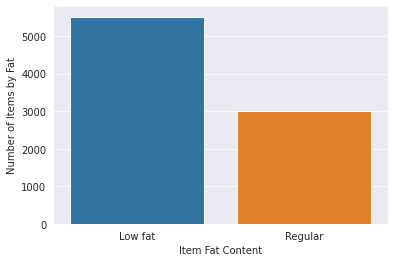

In [197]:
#Creating a countplot for Item_Fat_Content
sns.countplot(x='Item_Fat_Content', data=df);
plt.ylabel('Number of Items by Fat');
plt.xlabel('Item Fat Content');

##Use Histograms to view the distributions of features chosen in dataset

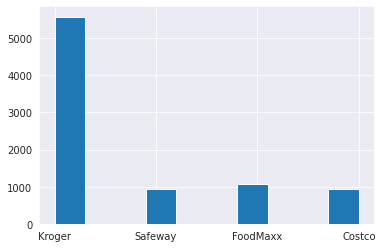

In [198]:
#Creating histogram of outlet types for summary statistics
df['Outlet_Type'].hist();

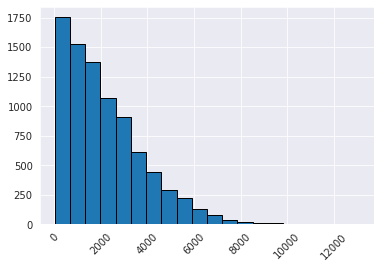

In [199]:
#Creating histogram of outlet sales for summary statistics
df['Item_Outlet_Sales'].hist(bins=20, edgecolor='black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=True, style='plain')

##Customization of stasitical analysis for boxplot

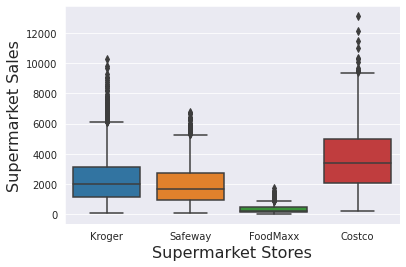

In [200]:
#Seaborn boxplot of stores based on their sales
from seaborn.rcmod import set_style
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df);
set_style('darkgrid');
plt.xlabel('Supermarket Stores', fontsize=16);
plt.ylabel('Supermarket Sales', fontsize=16);
plt.show;

##Heatmap of correlations

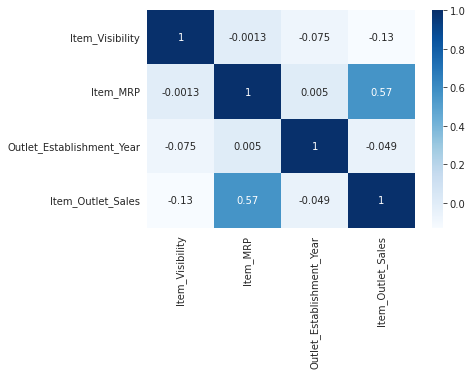

In [201]:
#Checking data for positive and negative correlations
corr = df.corr()
sns.heatmap(corr, cmap='Blues', annot=True);